## Instalo Dependencias

In [1]:
!pip install pytrends

In [2]:
import requests
from bs4 import BeautifulSoup
from collections import defaultdict
import json
import pandas as pd
import matplotlib.pyplot as plt
from pytrends.request import TrendReq
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta


## Twitter Trends

In [3]:
class TwitterTrends():
  def get_trends(region):
    url = f'https://trends24.in/{region}/'
    response = requests.get(url)

    if response.status_code == 200:

        html_content = response.text
        soup = BeautifulSoup(html_content, 'html.parser')
        trends = soup.find_all('div', class_='trend-card')
        tendencias = defaultdict(list)
        for trend_card in trends:
          fecha = trend_card.find('h5', class_='trend-card__time').text
          tendencias_list = trend_card.find_all('li')
          for tendencia in tendencias_list:
              tweet_count = tendencia.find('span', class_='tweet-count')
              if tweet_count:
                tweet_count = tweet_count.text.strip()
                tweet_count = int(tweet_count[:-1]) * 1000
                nombre_tendencia = tendencia.a.text.strip()
                url_tendencia = tendencia.a['href']
                tendencias[fecha].append({
                            'date': fecha,
                            'tweet': nombre_tendencia,
                            'url': url_tendencia,
                            'tweet_count': tweet_count
                        })


        df = pd.concat([pd.DataFrame(data) for data in tendencias.values()], ignore_index=True)
        tendencias = dict(sorted(tendencias.items(),reverse=True))
        return tendencias,df
    else:

        print('Error al obtener la página:', response.status_code)


In [169]:
tendencias,df = TwitterTrends.get_trends("argentina")


for fecha, lista_tendencias in tendencias.items():
    print(fecha)
    for tendencia in lista_tendencias:
        print(tendencia)
    print()
    break

14-05-2024 13:36:29
{'date': '14-05-2024 13:36:29', 'tweet': 'Hot Sale', 'url': 'https://twitter.com/search?q=%22Hot+Sale%22', 'tweet_count': 84000}
{'date': '14-05-2024 13:36:29', 'tweet': '#GranHermano', 'url': 'https://twitter.com/search?q=%23GranHermano', 'tweet_count': 166000}
{'date': '14-05-2024 13:36:29', 'tweet': 'Lucio', 'url': 'https://twitter.com/search?q=Lucio', 'tweet_count': 18000}
{'date': '14-05-2024 13:36:29', 'tweet': 'Gallardo', 'url': 'https://twitter.com/search?q=Gallardo', 'tweet_count': 28000}
{'date': '14-05-2024 13:36:29', 'tweet': 'Emma', 'url': 'https://twitter.com/search?q=Emma', 'tweet_count': 76000}
{'date': '14-05-2024 13:36:29', 'tweet': 'Mauro', 'url': 'https://twitter.com/search?q=Mauro', 'tweet_count': 34000}
{'date': '14-05-2024 13:36:29', 'tweet': '#GucciLondra', 'url': 'https://twitter.com/search?q=%23GucciLondra', 'tweet_count': 369000}
{'date': '14-05-2024 13:36:29', 'tweet': 'Dario', 'url': 'https://twitter.com/search?q=Dario', 'tweet_count': 1

In [173]:
df["datetime"]= pd.to_datetime(df["date"],dayfirst=True)
df['datetime_arg'] = df['datetime'] - timedelta(hours=3)

In [174]:
df

,date,tweet,url,tweet_count,datetime,datetime_arg
0,14-05-2024 13:36:29,Hot Sale,https://twitter.com/search?q=%22Hot+Sale%22,84000,2024-05-14 13:36:29,2024-05-14 10:36:29
1,14-05-2024 13:36:29,#GranHermano,https://twitter.com/search?q=%23GranHermano,166000,2024-05-14 13:36:29,2024-05-14 10:36:29
2,14-05-2024 13:36:29,Lucio,https://twitter.com/search?q=Lucio,18000,2024-05-14 13:36:29,2024-05-14 10:36:29
3,14-05-2024 13:36:29,Gallardo,https://twitter.com/search?q=Gallardo,28000,2024-05-14 13:36:29,2024-05-14 10:36:29
4,14-05-2024 13:36:29,Emma,https://twitter.com/search?q=Emma,76000,2024-05-14 13:36:29,2024-05-14 10:36:29
...,...,...,...,...,...,...
551,13-05-2024 08:06:08,Sosa,https://twitter.com/search?q=Sosa,13000,2024-05-13 08:06:08,2024-05-13 05:06:08
552,13-05-2024 08:06:08,Martinez,https://twitter.com/search?q=Martinez,54000,2024-05-13 08:06:08,2024-05-13 05:06:08
553,13-05-2024 08:06:08,Valeria Sampedro,https://twitter.com/search?q=%22Valeria+Samped...,13000,2024-05-13 08:06:08,2024-05-13 05:06:08
554,13-05-2024 08:06:08,Casemiro,https://twitter.com/search?q=Casemiro,59000,2024-05-13 08:06:08,2024-05-13 05:06:08


In [125]:
def plot_twitter_trends(tendencias,date):
    tweets_ordenados = sorted(tendencias[date], key=lambda x: x['tweet_count'])
    tweets = [tweet['tweet'] for tweet in tweets_ordenados]
    tweet_counts = [tweet['tweet_count'] for tweet in tweets_ordenados]

    plt.figure(figsize=(10, 6))
    plt.barh(tweets, tweet_counts, color='skyblue')
    plt.xlabel('Tweets')
    plt.ylabel('Tweet Count')
    plt.title(f'Tweets con el mayor tweet_count para la fecha {date}')
    #plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

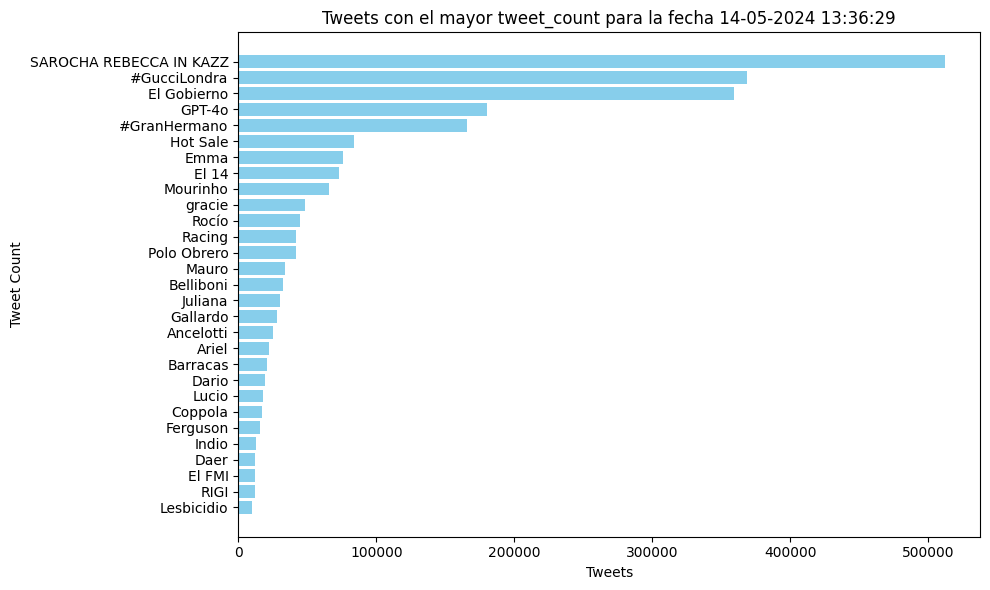

In [126]:
date = list(tendencias.keys())[0]
plot_twitter_trends(tendencias,date)


In [139]:
def plot_twitter_trends_last_day(tendencias,title):
    tweets = tendencias["tweet"]
    tweet_counts = tendencias["tweet_count"]

    plt.figure(figsize=(10, 6))
    plt.barh(tweets, tweet_counts, color='skyblue')
    plt.xlabel('Tweets')
    plt.ylabel('Tweet Count')
    plt.title(title)
    #plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [128]:
def get_top_tweets(df):
  df_sorted = df.sort_values(by='tweet_count', ascending=False)
  top_tweets = df_sorted.drop_duplicates(subset='tweet', keep='first')
  top_tweets= top_tweets.loc[:,["tweet","tweet_count"]]
  return top_tweets

In [129]:
top_tweets= get_top_tweets(df)
top_tweets.head(5)

,tweet,tweet_count
9,SAROCHA REBECCA IN KAZZ,512000
144,#GucciCruise25,373000
6,#GucciLondra,369000
22,El Gobierno,359000
171,#LeeKnowXGucci,340000


In [130]:
top_5_tweets = list(top_tweets["tweet"].head(5))
top_5_tweets

['SAROCHA REBECCA IN KAZZ',
 '#GucciCruise25',
 '#GucciLondra',
 'El Gobierno',
 '#LeeKnowXGucci']

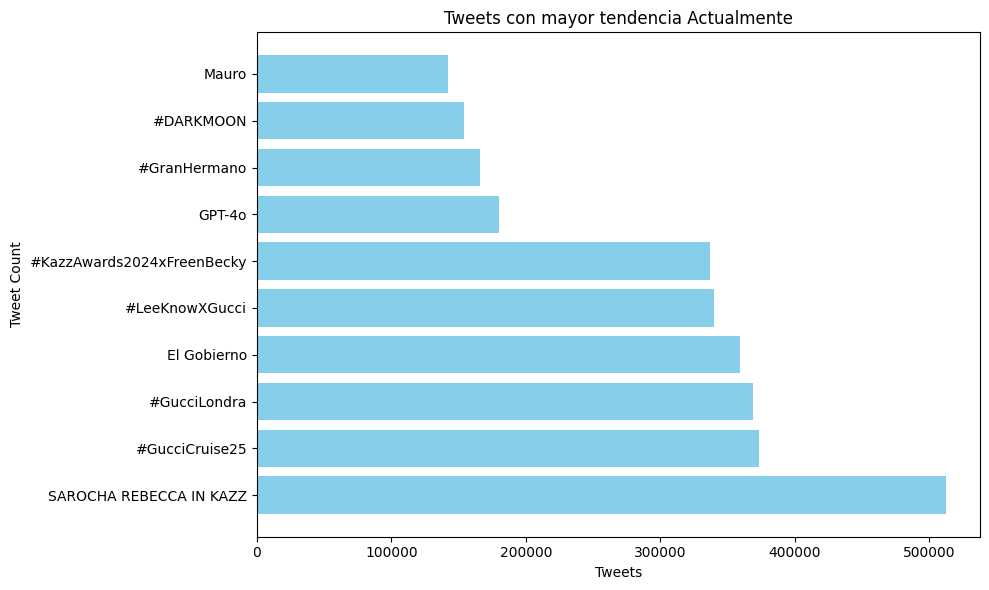

In [140]:
plot_twitter_trends_last_day(top_tweets.head(10),"Tweets con mayor tendencia Actualmente")


In [132]:
df_agrupado = df.groupby('tweet').agg({'tweet_count': 'sum'}).reset_index()
top_sum_tweets= get_top_tweets(df_agrupado)
top_sum_tweets.head(5)

,tweet,tweet_count
40,El Gobierno,2004000
70,Mauro,1923000
85,SAROCHA REBECCA IN KAZZ,1508000
3,#GranHermano,1435000
42,Emma,1249000


In [133]:
top_5_sum_tweets = list(top_sum_tweets["tweet"].head(5))
top_5_sum_tweets

['El Gobierno', 'Mauro', 'SAROCHA REBECCA IN KAZZ', '#GranHermano', 'Emma']

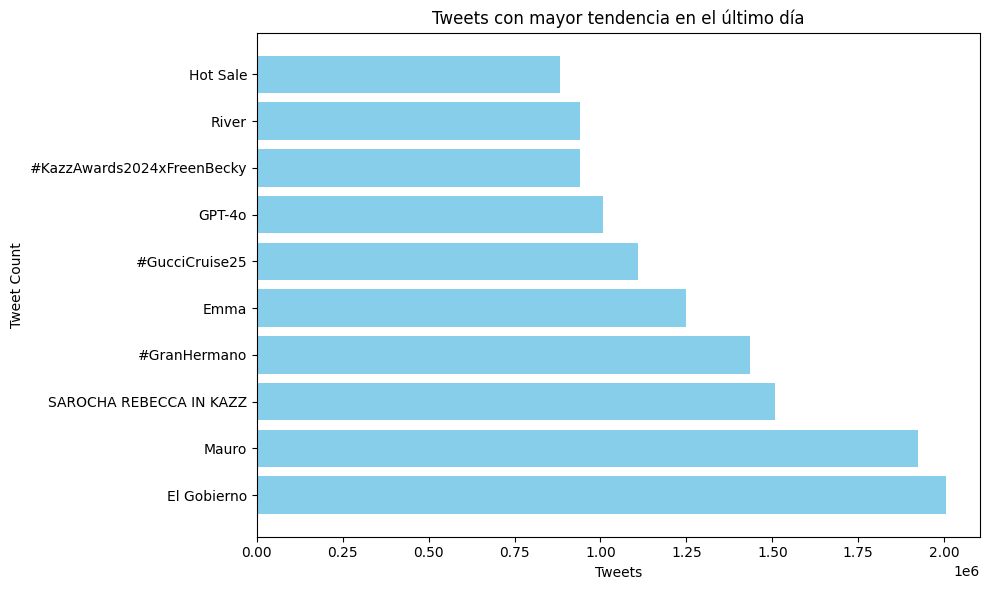

In [141]:
plot_twitter_trends_last_day(top_sum_tweets.head(10),"Tweets con mayor tendencia en el último día")

In [156]:
def plot_twitter_trend_evolution(df,top_tweets,title,date="datetime_arg"):
    df = df.sort_values(by=date)
    df_filtrado = df[df['tweet'].isin(top_tweets)]
    df_filtrado = df_filtrado.drop_duplicates(subset=[date, 'tweet'], keep='first')

    plt.figure(figsize=(10, 6))

    for tweet in df_filtrado['tweet'].unique():
          df_tweet_actual = df_filtrado[df_filtrado['tweet'] == tweet]
          plt.plot(df_tweet_actual[date], df_tweet_actual['tweet_count'], label=tweet)


    plt.xlabel('Fecha')
    plt.ylabel('Tweet Count')
    plt.title(title)
    plt.legend()

    date_formatter = DateFormatter('%Y-%m-%d %H:%M')
    plt.gca().xaxis.set_major_formatter(date_formatter)
    plt.xticks(rotation=30)
    plt.grid(True)
    plt.tight_layout()

    plt.show()

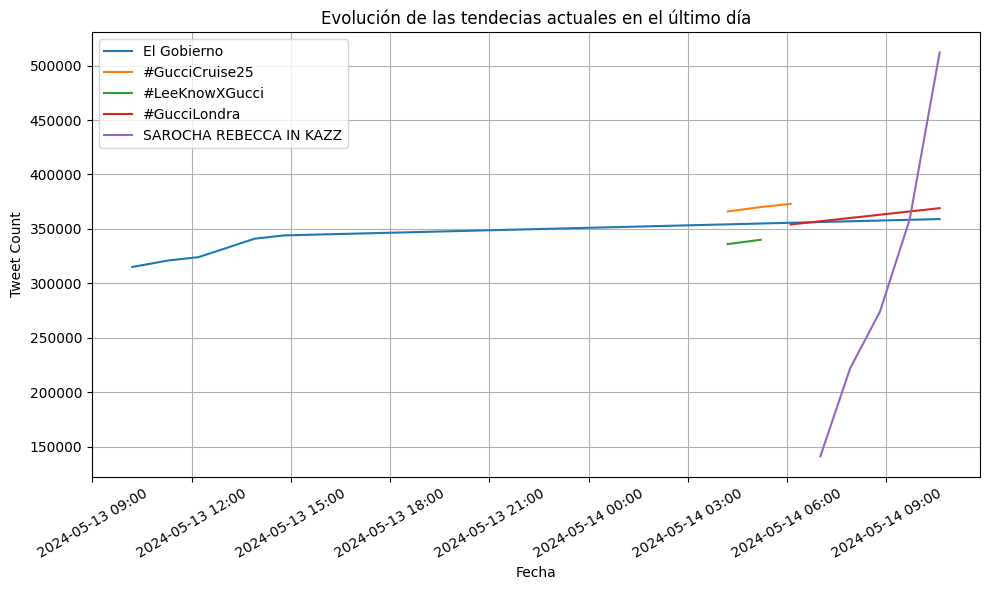

In [157]:
plot_twitter_trend_evolution(df,top_5_tweets,title='Evolución de las tendecias actuales en el último día')

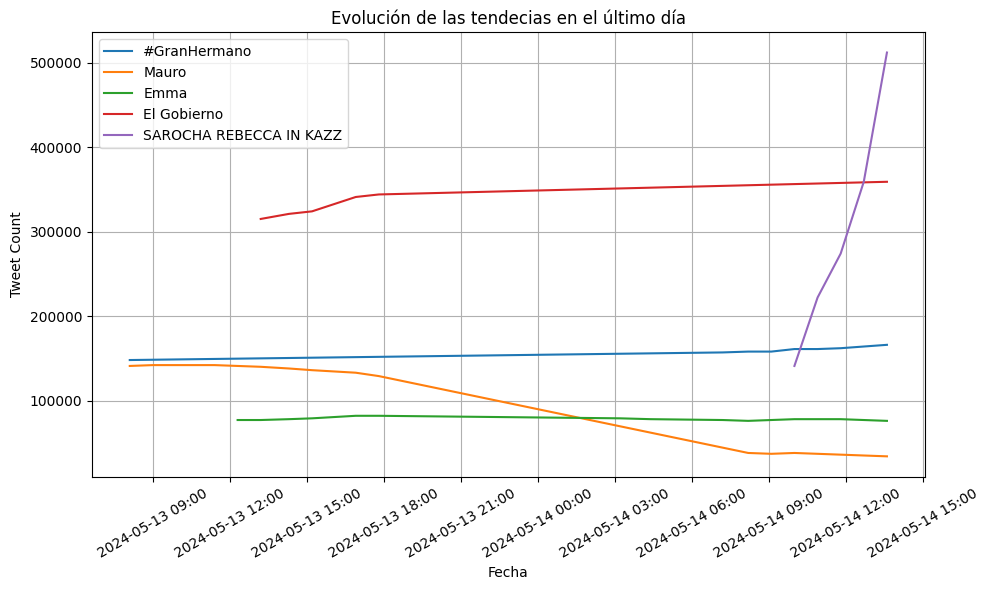

In [158]:
plot_twitter_trend_evolution(df,top_5_sum_tweets,date="datetime",title='Evolución de las tendecias en el último día')

In [175]:
def plot_twitter_trends_by_time(df):
  trends_subset = df.drop(columns=['date',"datetime","tweet","url"])
  df_grouped = trends_subset.groupby('datetime_arg').sum().reset_index()

  plt.figure(figsize=(15, 10))
  plt.plot(df_grouped['datetime_arg'], df_grouped['tweet_count'], linestyle='-')
  plt.xlabel('Date')
  plt.ylabel('Tweet Count')
  plt.title('Tweet Count by Date')
  plt.xticks(rotation=45)
  plt.grid(True)
  plt.tight_layout()
  plt.show()

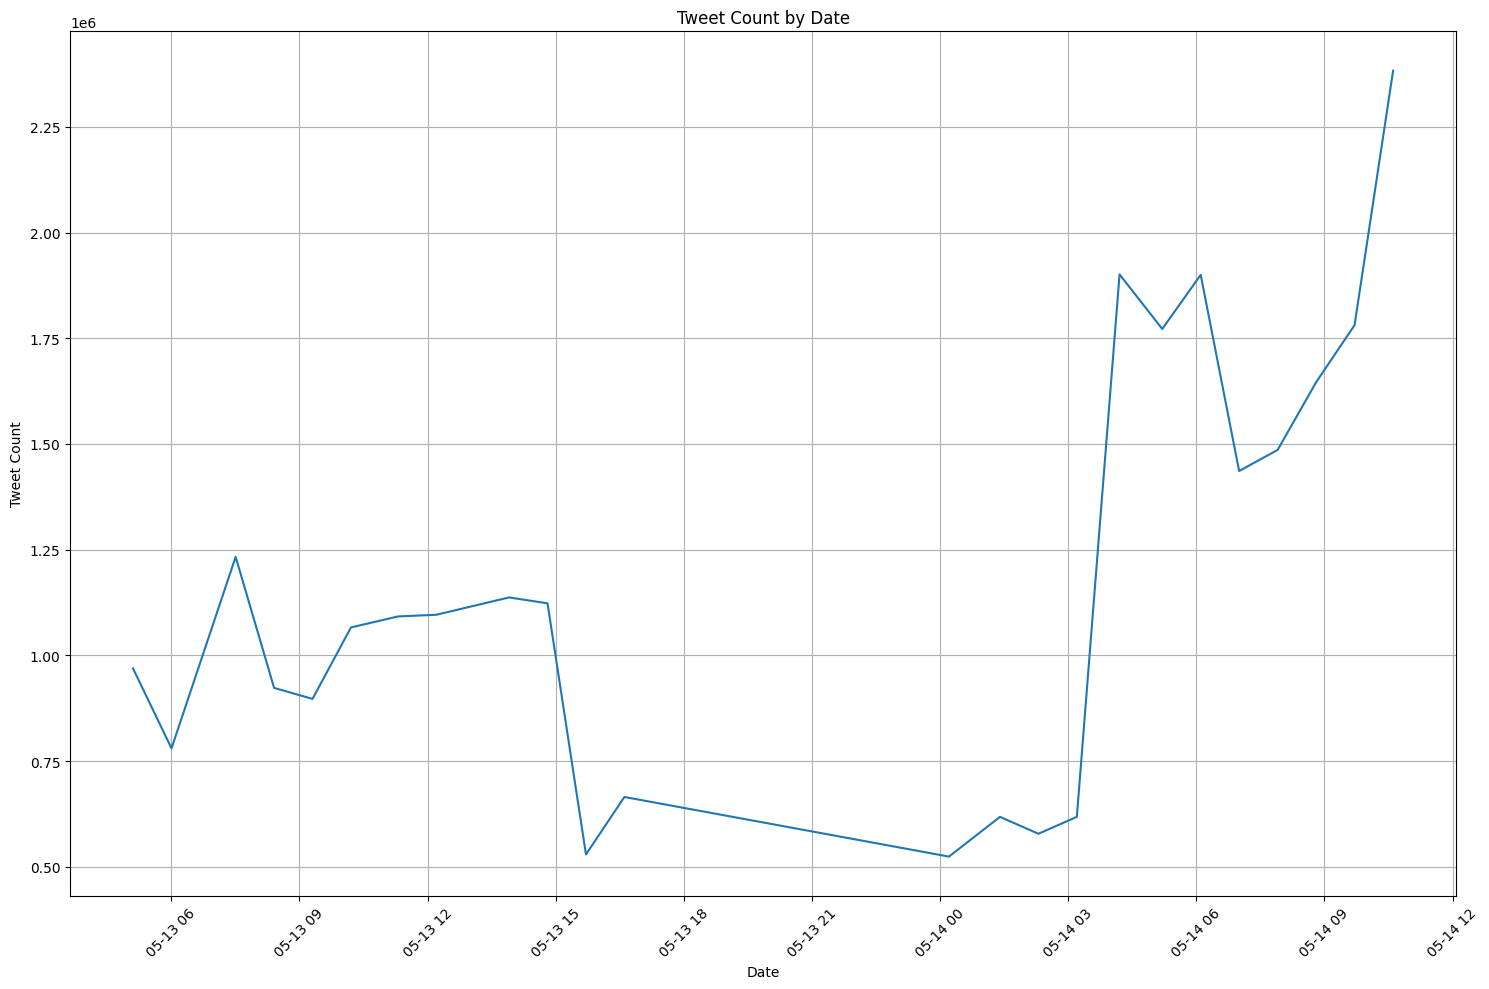

In [176]:
plot_twitter_trends_by_time(df)

## Google Trends

In [55]:
class GoogleTrends():

  def __init__(self,region):
    self.region = region
    self.pytrends = TrendReq(hl=region, tz=360)

  def get_trends(self,region):
    trends = self.pytrends.trending_searches(pn=region)
    return trends[0]

  def trends_by_time(self, keywords,timeframe='now 1-d' ):
    df_trends = pd.DataFrame()
    first = True
    for trend in keywords:
      self.pytrends.build_payload(kw_list=[trend], timeframe=timeframe, geo='AR')
      df_google_trends= self.pytrends.interest_over_time()
      df_google_trends.reset_index(inplace=True)
      df_google_trends = df_google_trends.loc[:,["date",trend]]
      if first:
        df_trends = df_google_trends
        first=False
      else:
        df_trends  = pd.merge(df_trends, df_google_trends,on='date', how='outer')
    return df_trends

  def trends_by_country(self, keywords,timeframe='now 1-d' ):

    trends_by_provincia = pd.DataFrame()
    first = True
    for trend in keywords:
      self.pytrends.build_payload(kw_list=[trend], timeframe=timeframe, geo='AR')
      df_google_trends= self.pytrends.interest_by_region(resolution="COUNTRY")
      df_google_trends.reset_index(inplace=True)
      df_google_trends = df_google_trends.loc[:,["geoName",trend]]

      if first:
        trends_by_provincia = df_google_trends
        first=False
      else:
        trends_by_provincia  = pd.merge(trends_by_provincia, df_google_trends,on='geoName', how='outer')
    return trends_by_provincia



### Trends

In [56]:
google_trends = GoogleTrends('es-AR')

In [48]:
trends = google_trends.get_trends("argentina")
trends

0               Boston Celtics
1            Twenty One Pilots
2                         RIGI
3                       Jaguar
4       Aston Villa  Liverpool
5                       Adidas
6                     Gimnasia
7                         Nike
8                         Puma
9     Barcelona  Real Sociedad
10                     Samsung
11                       Colon
12                       Union
13                    Sporting
14                        VANS
15                      Natura
16                      Coppel
17                        Fila
18                        Zara
19                    Motorola
Name: 0, dtype: object

In [49]:
keywords= trends.tolist()

### Trends By Time


In [41]:
trends_by_time = google_trends.trends_by_time(keywords)
trends_by_time = trends_by_time.fillna(0)
trends_by_time

,date,Boston Celtics,Twenty One Pilots,RIGI,Jaguar,Aston Villa Liverpool,Adidas,Gimnasia,Nike,Puma,...,Samsung,Colon,Union,Sporting,VANS,Natura,Coppel,Fila,Zara,Motorola
0,2024-05-13 12:40:00,0,0,16,10,0,81,6,67,65,...,84,12,9,66,40,40,50,NaN,NaN,NaN
1,2024-05-13 12:48:00,0,0,20,0,0,81,6,59,63,...,88,12,9,65,54,53,52,61.0,33.0,58.0
2,2024-05-13 12:56:00,0,0,19,15,0,72,7,63,58,...,89,11,10,74,53,48,66,55.0,47.0,65.0
3,2024-05-13 13:04:00,0,0,33,11,0,84,5,63,57,...,81,13,11,65,41,44,65,51.0,44.0,55.0
4,2024-05-13 13:12:00,0,0,14,15,0,75,4,65,59,...,82,12,10,67,52,41,69,57.0,40.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,2024-05-14 12:08:00,0,47,0,18,0,54,8,43,43,...,52,12,10,48,31,51,59,32.0,27.0,34.0
177,2024-05-14 12:16:00,9,41,44,0,10,55,6,43,43,...,59,11,10,54,29,40,52,42.0,34.0,50.0
178,2024-05-14 12:24:00,0,80,22,11,0,55,6,43,40,...,55,10,9,71,37,44,35,30.0,24.0,47.0
179,2024-05-14 12:32:00,0,50,0,14,0,53,7,44,44,...,60,10,9,50,26,35,35,40.0,29.0,45.0


In [115]:
trends_by_time['datetime'] = pd.to_datetime(trends_by_time['date'])
trends_by_time['datetime_arg'] = trends_by_time['datetime'] - timedelta(hours=3)

In [71]:
def get_top_search(df,keywords):
  suma_total = df[keywords].sum()
  tendencias_suma_total = [(tendencia, suma) for tendencia, suma in suma_total.items()]
  tendencias_suma_total.sort(key=lambda x: x[1], reverse=True)
  return tendencias_suma_total

In [73]:
top_search = get_top_search(trends_by_time,keywords)
top_search

[('Samsung', 12855.0),
 ('Adidas', 12176.0),
 ('Nike', 10756.0),
 ('Puma', 10484.0),
 ('Sporting', 9631.0),
 ('Motorola', 9215.0),
 ('Natura', 8288.0),
 ('Coppel', 8115.0),
 ('VANS', 6999.0),
 ('Fila', 6818.0),
 ('Zara', 4999.0),
 ('Colon', 3251.0),
 ('Twenty One Pilots', 3008.0),
 ('Gimnasia', 2802.0),
 ('Union', 2691.0),
 ('RIGI', 2051.0),
 ('Aston Villa  Liverpool', 1631.0),
 ('Jaguar', 1621.0),
 ('Barcelona  Real Sociedad', 1211.0),
 ('Boston Celtics', 820.0)]

In [83]:
def plot_google_trends(data,title):
  nombres = [x[0] for x in data]
  valores = [x[1] for x in data]

  plt.figure(figsize=(10, 6))
  plt.barh(nombres, valores, color='skyblue')
  plt.xlabel('Cantidad de Búsquedas')
  plt.ylabel('Palabras clave')
  plt.title(title)
  plt.gca().invert_yaxis()
  plt.tight_layout()
  plt.show()

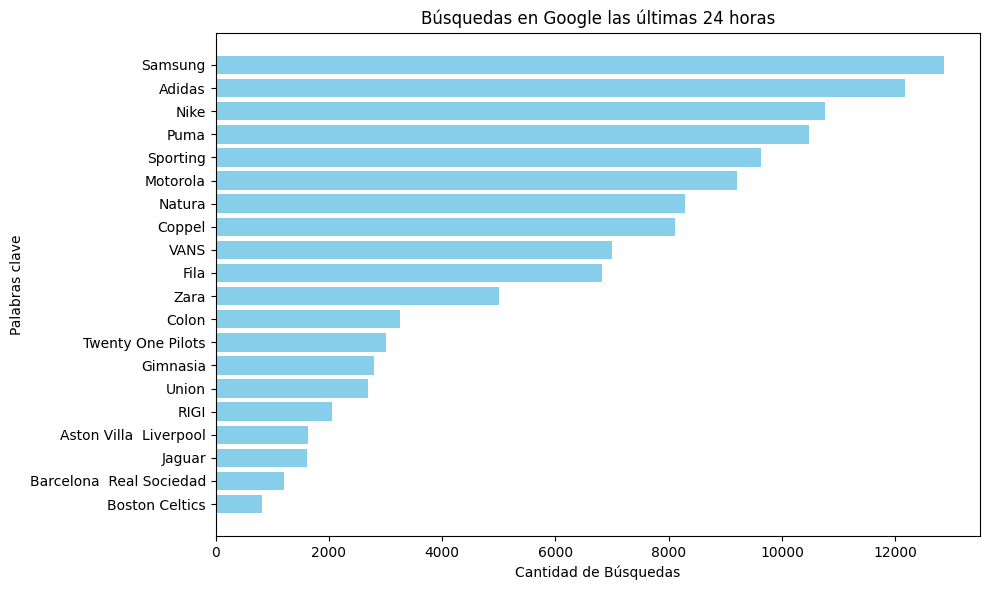

In [86]:
plot_google_trends(top_search,"Búsquedas en Google las últimas 24 horas")

In [77]:
top_search_now = [tupla for tupla in top_search if tupla[0] in keywords[0:5]]
top_search_now

[('Twenty One Pilots', 3008.0),
 ('RIGI', 2051.0),
 ('Aston Villa  Liverpool', 1631.0),
 ('Jaguar', 1621.0),
 ('Boston Celtics', 820.0)]

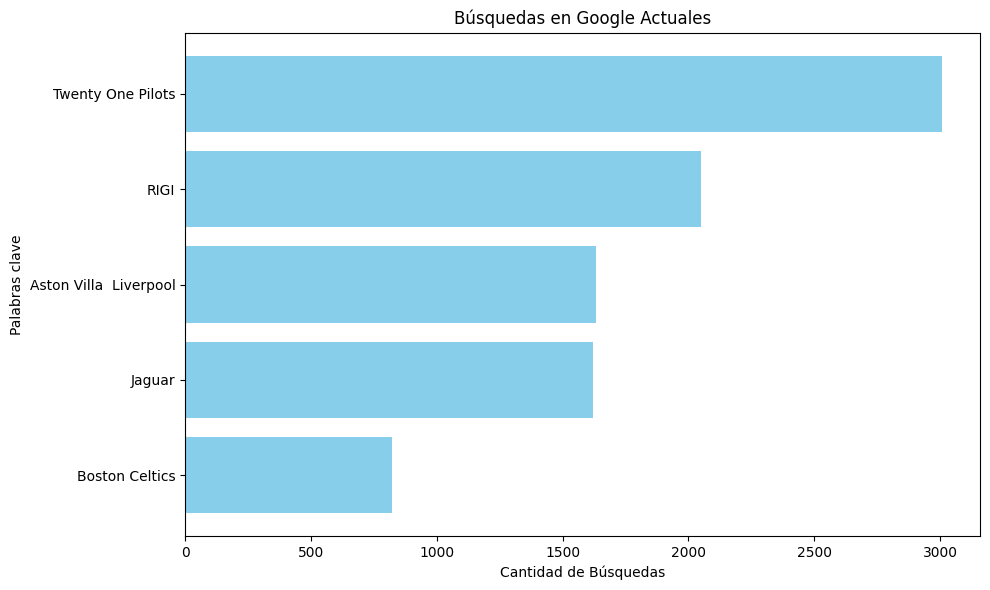

In [87]:
plot_google_trends(top_search_now,"Búsquedas en Google Actuales")

In [116]:
def plot_google_trends_by_time(df,trends,title):
  plt.figure(figsize=(15, 10))
  for trend in trends:
      plt.plot(df['datetime_arg'], df[trend], label=trend)

  plt.xlabel('Fecha')
  plt.ylabel('Cantidad de Búsquedas')
  plt.title(title)
  plt.legend()
  plt.xticks(rotation=45)
  plt.grid(True)
  plt.tight_layout()
  plt.show()


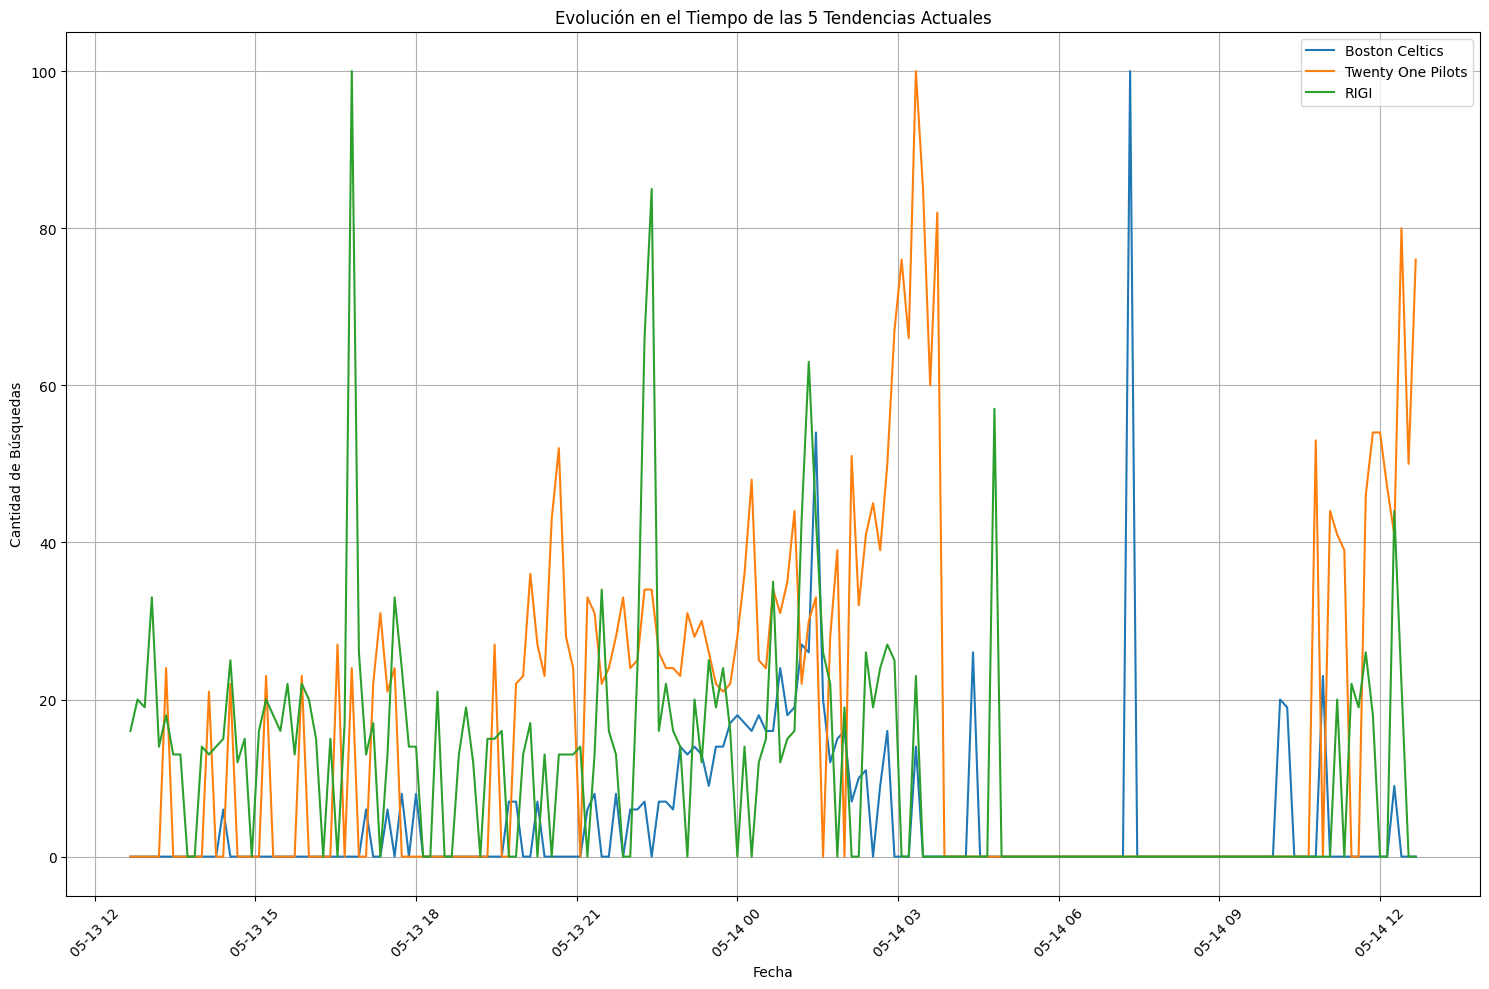

In [94]:
top_current_trends = keywords[0:3]
plot_google_trends_by_time(trends_by_time,top_current_trends,"Evolución en el Tiempo de las 5 Tendencias Actuales")


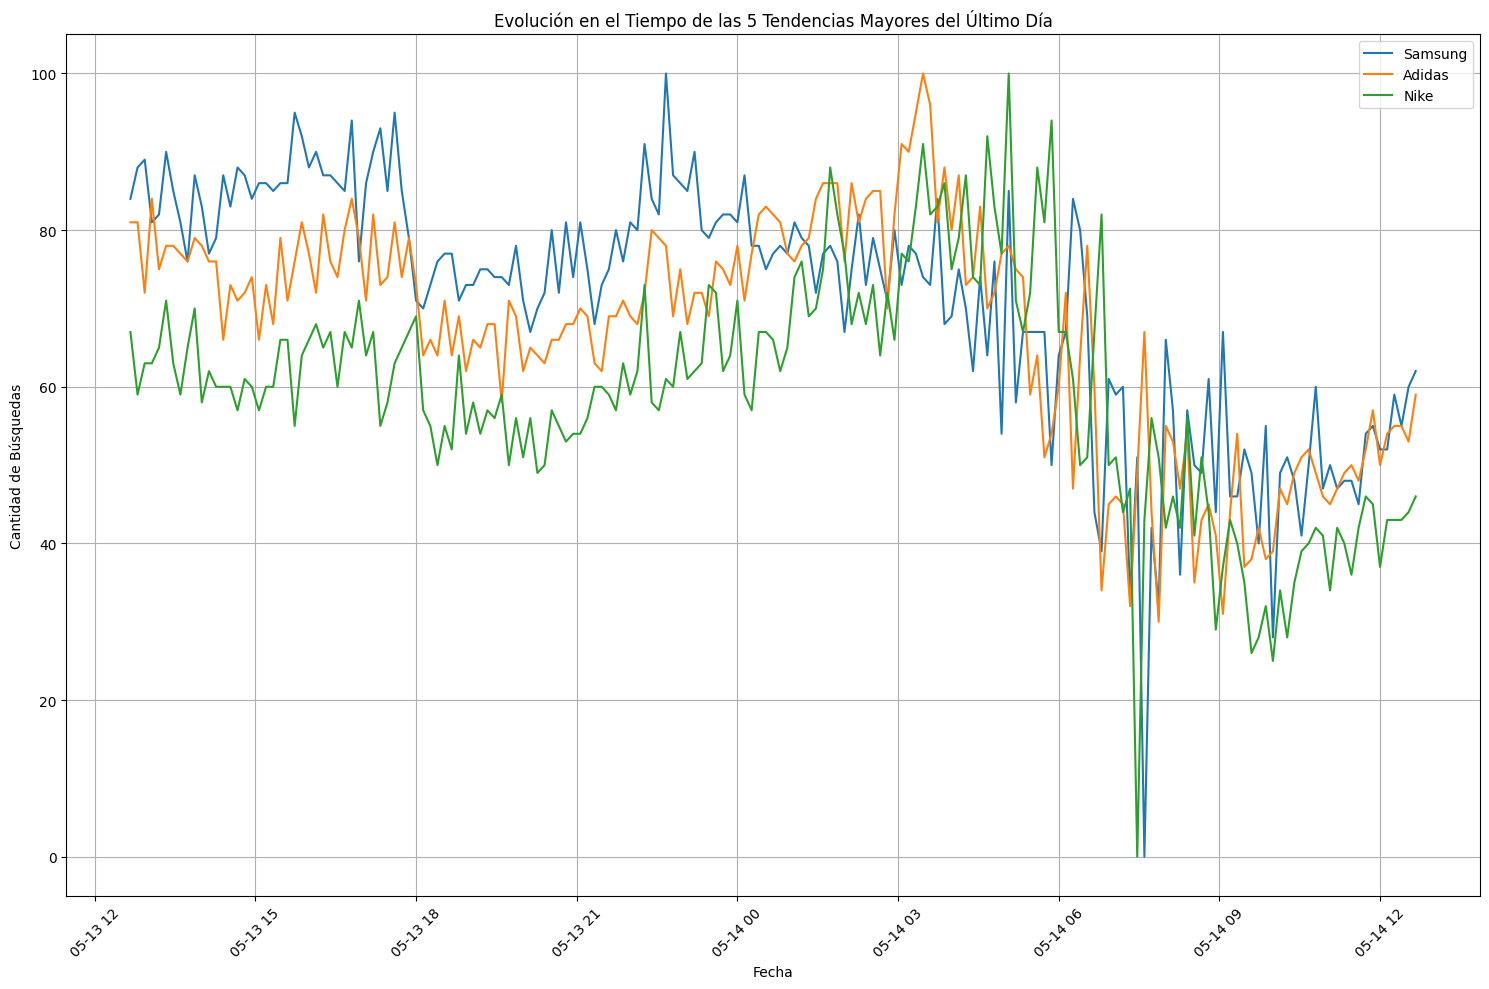

In [96]:
top_trends = [tupla[0] for tupla in top_search[0:3]]
plot_google_trends_by_time(trends_by_time,top_trends,"Evolución en el Tiempo de las 5 Tendencias Mayores del Último Día")


In [120]:
def plot_count_trends_by_hour(df,title):
  trends_subset = df.drop(columns=['date',"datetime"])
  df_sum = trends_subset.groupby('datetime_arg').sum().reset_index()

  plt.figure(figsize=(15, 10))
  plt.plot(df_sum['datetime_arg'], df_sum.iloc[:, 1:].sum(axis=1))

  plt.xlabel('Fecha')
  plt.ylabel('Suma de búsquedas')
  plt.title(title)
  plt.xticks(rotation=45)
  plt.grid(True)
  plt.tight_layout()

  plt.show()

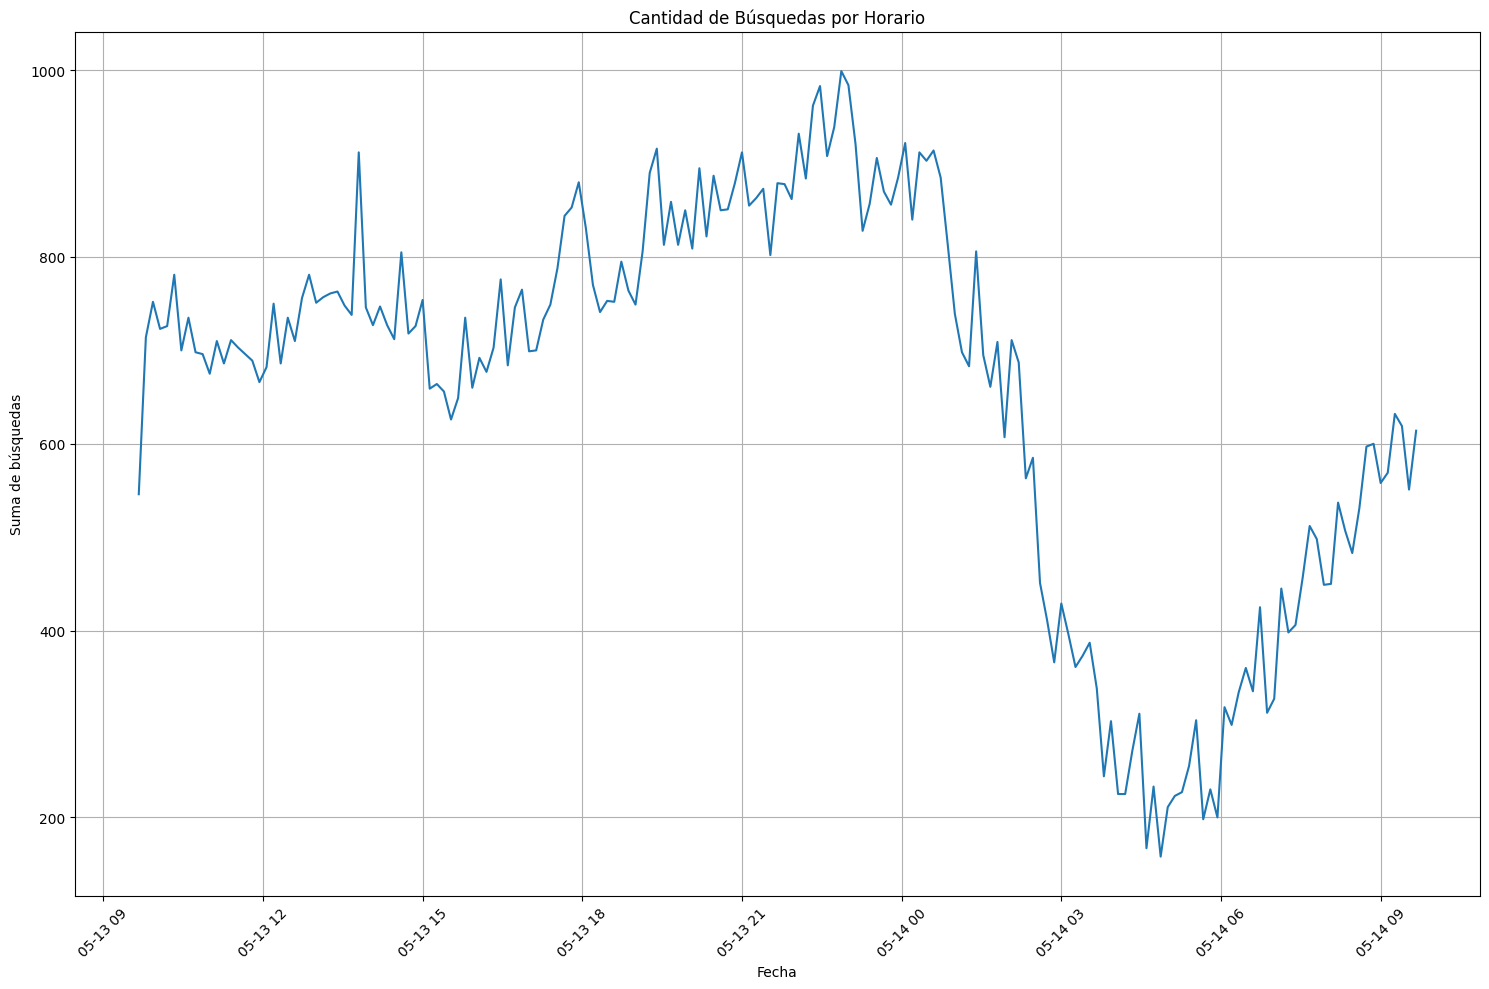

In [121]:
plot_count_trends_by_hour(trends_by_time,'Cantidad de Búsquedas por Horario')

#### Trends By Region

In [ ]:
trends_by_region = google_trends.trends_by_country(keywords)
trends_by_region

,geoName,Adidas,Nike,PUMA,Aston Villa - Liverpool,Samsung,Barcelona - Real Sociedad,Sporting,Leverkusen,Natura,...,Denver Nuggets,Fila,Motorola,Virgen de fatima,Reebok,New Balance,Modo,Freidora de aire,Zapatillas,Ver
0,Buenos Aires,95,93,95,77,84,42,13,75,83,...,59,68,87,18,71,81,71,80,88,78
1,Catamarca,50,36,35,0,59,81,62,73,94,...,38,62,71,38,44,0,49,67,67,84
2,Chaco,43,31,26,63,59,51,19,71,62,...,59,46,54,44,63,46,35,54,55,81
3,Chubut,68,84,54,67,71,31,18,88,69,...,52,54,68,15,98,96,42,66,80,64
4,Ciudad Autónoma de Buenos Aires,100,100,100,78,100,33,14,59,72,...,56,100,69,21,85,95,100,100,71,63
5,Corrientes,46,35,28,74,55,47,31,77,56,...,43,43,63,83,63,56,44,33,54,85
6,Córdoba,97,61,60,55,84,23,22,63,71,...,66,68,72,24,84,99,60,87,95,77
7,Entre Ríos,75,54,43,50,64,14,24,58,62,...,69,56,68,52,75,65,53,57,98,73
8,Formosa,27,21,22,79,42,0,17,86,62,...,0,27,58,66,68,0,39,36,42,86
9,Jujuy,65,37,40,93,76,47,72,74,72,...,55,48,100,41,57,48,50,34,69,91
